# Week4授業課題 信用情報を学習しよう

## 【問題1】パイプラインの作成
授業前課題で行ったことを参考に、学習し推定結果を出すまでの一連の流れを行ってください。テストデータに対して推定を行い、それをKaggleに提出してみましょう。この段階では高い精度を出す必要はありません。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 200)

# read train and test data
train = pd.read_csv('application_train.csv')
test = pd.read_csv('application_test.csv')

In [2]:
#Confirm data
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#カテゴリカル変数をOneHotEncodingを行う
train_dummies = pd.get_dummies(train)
train_dummies.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_dummies = pd.get_dummies(test)
test_dummies.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100001,0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241,-2329,-5170.0,...,0,0,0,0,0,0,1,0,1,0
1,100005,0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064,-4469,-9118.0,...,0,0,0,0,0,0,0,0,0,0
2,100013,0,202500.0,663264.0,69777.0,630000.0,0.019101,-20038,-4458,-2175.0,...,0,0,0,0,0,0,0,0,0,0
3,100028,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976,-1866,-2000.0,...,0,0,0,0,0,1,0,0,1,0
4,100038,1,180000.0,625500.0,32067.0,625500.0,0.010032,-13040,-2191,-4000.0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#trainの欠損値を確認
train_dummies.isnull().sum()

SK_ID_CURR                                       0
TARGET                                           0
CNT_CHILDREN                                     0
AMT_INCOME_TOTAL                                 0
AMT_CREDIT                                       0
AMT_ANNUITY                                     12
AMT_GOODS_PRICE                                278
REGION_POPULATION_RELATIVE                       0
DAYS_BIRTH                                       0
DAYS_EMPLOYED                                    0
DAYS_REGISTRATION                                0
DAYS_ID_PUBLISH                                  0
OWN_CAR_AGE                                 202929
FLAG_MOBIL                                       0
FLAG_EMP_PHONE                                   0
FLAG_WORK_PHONE                                  0
FLAG_CONT_MOBILE                                 0
FLAG_PHONE                                       0
FLAG_EMAIL                                       0
CNT_FAM_MEMBERS                

In [7]:
#testの欠損値確認
test_dummies.isnull().sum()

SK_ID_CURR                                      0
CNT_CHILDREN                                    0
AMT_INCOME_TOTAL                                0
AMT_CREDIT                                      0
AMT_ANNUITY                                    24
AMT_GOODS_PRICE                                 0
REGION_POPULATION_RELATIVE                      0
DAYS_BIRTH                                      0
DAYS_EMPLOYED                                   0
DAYS_REGISTRATION                               0
DAYS_ID_PUBLISH                                 0
OWN_CAR_AGE                                 32312
FLAG_MOBIL                                      0
FLAG_EMP_PHONE                                  0
FLAG_WORK_PHONE                                 0
FLAG_CONT_MOBILE                                0
FLAG_PHONE                                      0
FLAG_EMAIL                                      0
CNT_FAM_MEMBERS                                 0
REGION_RATING_CLIENT                            0


In [8]:
# 欠損値を列ごとの平均値で補完(trainでtrainとtestを補う)
train_dummies = train_dummies.fillna(train_dummies.mean())
test_dummies = test_dummies.fillna(train_dummies.mean())

## 0で補完
#train_dummies = train_dummies.fillna(0)
#test_dummies = test_dummies.fillna(0)

In [9]:
#確認
#欠損なくなっている
print(train_dummies.isnull().sum().sum())
train_dummies.head()

0


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#欠損なくなっている
print(test_dummies.isnull().sum().sum())
test_dummies.head()

0


,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100001,0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241,-2329,-5170.0,...,0,0,0,0,0,0,1,0,1,0
1,100005,0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064,-4469,-9118.0,...,0,0,0,0,0,0,0,0,0,0
2,100013,0,202500.0,663264.0,69777.0,630000.0,0.019101,-20038,-4458,-2175.0,...,0,0,0,0,0,0,0,0,0,0
3,100028,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976,-1866,-2000.0,...,0,0,0,0,0,1,0,0,1,0
4,100038,1,180000.0,625500.0,32067.0,625500.0,0.010032,-13040,-2191,-4000.0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# trainデータのTARGETとfeatures間の相関係数を算出
feature_corr = train_dummies.corr(method='pearson')
feature_corr

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,...,0.000553,0.002073,-0.000976,0.000072,-0.001396,0.002300,-1.280782e-03,-0.000270,0.000510,0.002549
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039628,-0.037227,0.078239,-0.044932,...,0.000982,-0.006777,-0.001713,-0.009384,0.000628,-0.033119,-1.265666e-02,0.007946,-0.042201,0.004829
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001826,-0.025573,0.330938,-0.239818,...,-0.001830,-0.005272,-0.000709,0.001607,-0.002032,-0.020892,-2.508821e-02,0.011036,-0.038644,0.004525
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159600,0.074796,0.027261,-0.064223,...,0.000718,0.011696,0.006149,0.023886,0.003886,0.032753,1.652333e-02,-0.003369,0.050174,-0.002894
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770127,0.986588,0.099738,-0.055436,-0.066838,...,0.000869,0.014314,0.007987,0.027255,0.005799,0.046644,9.756049e-03,-0.007373,0.058256,-0.004308
AMT_ANNUITY,-0.000433,-0.012817,0.021374,0.191657,0.770127,1.000000,0.774661,0.118424,0.009445,-0.104331,...,0.002166,0.015589,0.010077,0.035318,0.005968,0.054987,9.188486e-03,-0.007711,0.068144,-0.003910
AMT_GOODS_PRICE,-0.000232,-0.039628,-0.001826,0.159600,0.986588,0.774661,1.000000,0.103482,-0.053416,-0.064826,...,0.000796,0.013687,0.009953,0.028299,0.005877,0.049740,1.288238e-02,-0.009128,0.062849,-0.004846
REGION_POPULATION_RELATIVE,0.000849,-0.037227,-0.025573,0.074796,0.099738,0.118424,0.103482,1.000000,-0.029582,-0.003980,...,0.011212,0.078062,0.016288,0.045775,0.013435,0.092652,1.078225e-02,-0.056263,0.103513,-0.029932
DAYS_BIRTH,-0.001500,0.078239,0.330938,0.027261,-0.055436,0.009445,-0.053416,-0.029582,1.000000,-0.615864,...,0.000388,-0.006749,-0.000262,0.004421,-0.000690,-0.013597,-1.096440e-02,0.008758,-0.019852,0.005434
DAYS_EMPLOYED,0.001366,-0.044932,-0.239818,-0.064223,-0.066838,-0.104331,-0.064826,-0.003980,-0.615864,1.000000,...,-0.001761,0.003691,-0.003692,-0.006892,-0.003120,-0.004193,-6.326739e-03,-0.002846,-0.010907,-0.003571


In [12]:
# 相関係数行列から目的変数の列を抽出
feature_target_corr = feature_corr.loc[:,'TARGET']
feature_target_corr

SK_ID_CURR                                 -0.002108
TARGET                                      1.000000
CNT_CHILDREN                                0.019187
AMT_INCOME_TOTAL                           -0.003982
AMT_CREDIT                                 -0.030369
AMT_ANNUITY                                -0.012817
AMT_GOODS_PRICE                            -0.039628
REGION_POPULATION_RELATIVE                 -0.037227
DAYS_BIRTH                                  0.078239
DAYS_EMPLOYED                              -0.044932
DAYS_REGISTRATION                           0.041975
DAYS_ID_PUBLISH                             0.051457
OWN_CAR_AGE                                 0.020871
FLAG_MOBIL                                  0.000534
FLAG_EMP_PHONE                              0.045982
FLAG_WORK_PHONE                             0.028524
FLAG_CONT_MOBILE                            0.000370
FLAG_PHONE                                 -0.023806
FLAG_EMAIL                                 -0.

In [13]:
# 値で相関係数の絶対値に関して降順にソートする
feature_target_corr  = abs(feature_target_corr).sort_values(ascending = False)
feature_target_corr 

TARGET                                               1.000000
EXT_SOURCE_2                                         0.160303
EXT_SOURCE_3                                         0.157397
EXT_SOURCE_1                                         0.099152
DAYS_BIRTH                                           0.078239
REGION_RATING_CLIENT_W_CITY                          0.060893
REGION_RATING_CLIENT                                 0.058899
NAME_INCOME_TYPE_Working                             0.057481
NAME_EDUCATION_TYPE_Higher education                 0.056593
DAYS_LAST_PHONE_CHANGE                               0.055218
CODE_GENDER_M                                        0.054713
CODE_GENDER_F                                        0.054704
DAYS_ID_PUBLISH                                      0.051457
REG_CITY_NOT_WORK_CITY                               0.050994
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
NAME_INCOME_TYPE_Pensioner                           0.046209
ORGANIZA

In [14]:
#TARGETと相関の高い上位10個の特徴量 (0番目はTARGET同士の相関なので除外)
corr_10 = feature_target_corr[1:11].index

### 学習用データと検証用データに分割

In [15]:
# scikit-learnライブラリのtrain_test_splitメソッドをインポート
from sklearn.model_selection import train_test_split

# train_test_splitメソッドにてデータを学習データとテストデータに分割　学習データは75%で設定
X_train, X_test, y_train, y_test = train_test_split(train_dummies.loc[:, train_dummies.columns != 'TARGET'], train_dummies.loc[:, 'TARGET'], 
                                                                                        test_size = 0.25, random_state = 0)


### pipelineの作成

In [19]:
# Pipeline クラスをインポート
from sklearn.pipeline import Pipeline
# StanardScalerクラスをインポート
from sklearn.preprocessing import StandardScaler
#PCA classをインポート
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV

# 各機械学習モデルをインポート

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import  LinearRegression

from sklearn.ensemble import GradientBoostingClassifier

In [21]:
pl = Pipeline([
    ('scl', StandardScaler()),
    ('pca', PCA()),
    ('gbc', GradientBoostingClassifier())
])

In [68]:
"""
parameters = {"pca__n_components" : range(2, 6),
              "svc__kernel" : ["linear", "poly", "rbf", "sigmoid"],
              'svc__C': np.logspace(0, 2, 10).tolist(),
              "svc__gamma": np.logspace(-3, 0, 10).tolist()}
"""

'\nparameters = {"pca__n_components" : range(2, 6),\n              "svc__kernel" : ["linear", "poly", "rbf", "sigmoid"],\n              \'svc__C\': np.logspace(0, 2, 10).tolist(),\n              "svc__gamma": np.logspace(-3, 0, 10).tolist()}\n'

In [ ]:
#clf = GridSearchCV(pl, parameters, n_jobs=-1)

In [ ]:
"""
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
"""

'\nscaler = StandardScaler()\nscaler.fit(X_train)\nX_train = scaler.transform(X_train)\n'

In [22]:
pl.fit(X_train.loc[:, corr_10], y_train)

Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('gbc',
                 GradientBoostingClassifier(criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
      

In [23]:
pred = pl.predict(X_test.loc[:, corr_10])
pred

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
prob = pl.predict_proba(X_test.loc[:, corr_10])
prob

array([[0.74153952, 0.25846048],
       [0.97886079, 0.02113921],
       [0.85236275, 0.14763725],
       ...,
       [0.96832368, 0.03167632],
       [0.7467714 , 0.2532286 ],
       [0.94696533, 0.05303467]])

### 評価

In [25]:
#scoreを表示
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     70787
           1       0.44      0.00      0.01      6091

    accuracy                           0.92     76878
   macro avg       0.68      0.50      0.48     76878
weighted avg       0.88      0.92      0.88     76878



## 【問題2】指標値の関数作成
このコンペティションでは提出した確率から指標値 AUC (Area under an ROC curve)が計算され、それで順位が決まります。（Evaluationのページ参照）
ROC (Receiver operating characteristic)

このAUCを計算する関数を作成してください。

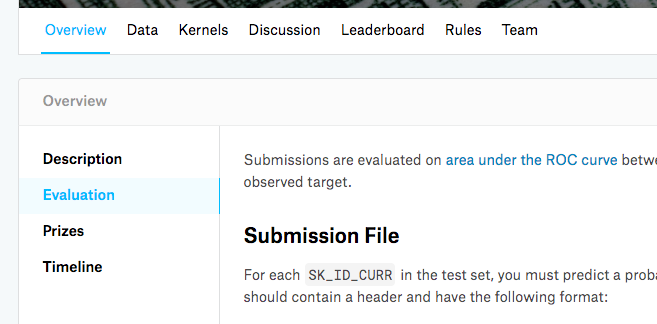

In [26]:
from IPython.display import display
from PIL import Image
display(Image.open('screen_shot.png'))

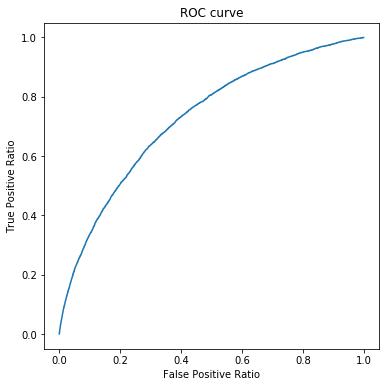

In [30]:
from sklearn.metrics import  roc_curve
fpr, tpr, thresholds = roc_curve(y_test, prob[:, 1])
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.xlabel("False Positive Ratio")
plt.ylabel("True Positive Ratio")
plt.show()

In [32]:
#AUC (Area under curve)
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, pred)
print(auc)

0.5013151306781063


# 【問題3】前処理・Feature Engineering・学習
精度を上げるために前処理・Feature Engineeringを行ってください。そしてその特徴量によって学習、検証、再び前処理の流れを繰り返しましょう。この工程はEDAの続きとも言えます。Week3で学んだことを思い出しながら進めてください。

汎化性能が高いモデルが作成できたと判断した場合は再びKaggleに提出をしましょう。

In [48]:
#特徴量をさらに3つに絞る
corr_3 = corr_10[:3]

Index(['EXT_SOURCE_2', 'EXT_SOURCE_3', 'EXT_SOURCE_1'], dtype='object')

In [49]:
#特徴量の二乗をとり
#一乗と二乗を合わせた特徴量を作る
np.concatenate((np.array(X_train.loc[:, corr_3]), np.power(np.array(X_train.loc[:, corr_3]), 2)), axis=1)

array([[0.51469267, 0.62122634, 0.50212981, 0.26490854, 0.38592216,
        0.25213434],
       [0.70684092, 0.28078957, 0.50212981, 0.49962409, 0.07884279,
        0.25213434],
       [0.43148173, 0.51085291, 0.50212981, 0.18617648, 0.26097069,
        0.25213434],
       ...,
       [0.28589787, 0.51085291, 0.36230727, 0.08173759, 0.26097069,
        0.13126656],
       [0.39004599, 0.81391747, 0.50212981, 0.15213587, 0.66246165,
        0.25213434],
       [0.67963595, 0.51085291, 0.50212981, 0.46190503, 0.26097069,
        0.25213434]])

In [54]:
#fit
pl.fit(np.concatenate((np.array(X_train.loc[:, corr_3]), np.power(np.array(X_train.loc[:, corr_3]), 2)), axis=1), y_train)

Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('rfc',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=10, n_jobs=None,
                           

In [56]:
#pred
pred = pl.predict(np.concatenate((np.array(X_test.loc[:, corr_3]), np.power(np.array(X_test.loc[:, corr_3]), 2)), axis=1))
#proba
prob = pl.predict_proba(np.concatenate((np.array(X_test.loc[:, corr_3]), np.power(np.array(X_test.loc[:, corr_3]), 2)), axis=1))

In [57]:
#scoreを表示
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     70787
           1       0.18      0.06      0.08      6091

    accuracy                           0.91     76878
   macro avg       0.55      0.52      0.52     76878
weighted avg       0.86      0.91      0.88     76878



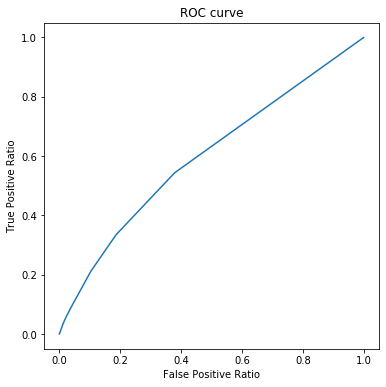

In [58]:
from sklearn.metrics import  roc_curve
fpr, tpr, thresholds = roc_curve(y_test, prob[:, 1])
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.xlabel("False Positive Ratio")
plt.ylabel("True Positive Ratio")
plt.show()

In [59]:
#AUC (Area under curve)
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, pred)
print(auc)

0.517012092882596


ちょっとだけ上がった。